In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from itertools import combinations

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/mscds/Research Project/MBA/MBA.DATA.xlsx")

In [ ]:
df.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522064 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   BillNo      522064 non-null  object        
 1   Itemname    520609 non-null  object        
 2   Quantity    522064 non-null  int64         
 3   Date        522064 non-null  datetime64[ns]
 4   Price       522064 non-null  float64       
 5   CustomerID  388023 non-null  float64       
 6   Country     522064 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 27.9+ MB


In [ ]:
df.isnull().sum()

,0
BillNo,0
Itemname,1455
Quantity,0
Date,0
Price,0
CustomerID,134041
Country,0


In [ ]:
#Data Cleaning
# Remove missing values in essential columns (BillNo and Itemname)
df.dropna(subset=["CustomerID", "Itemname"], inplace=True)

In [ ]:
df.isnull().info()

<class 'pandas.core.frame.DataFrame'>
Index: 388023 entries, 0 to 522063
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   BillNo      388023 non-null  bool 
 1   Itemname    388023 non-null  bool 
 2   Quantity    388023 non-null  bool 
 3   Date        388023 non-null  bool 
 4   Price       388023 non-null  bool 
 5   CustomerID  388023 non-null  bool 
 6   Country     388023 non-null  bool 
dtypes: bool(7)
memory usage: 5.6 MB


In [ ]:
df.shape

(388023, 7)

In [ ]:
df.duplicated().sum()

np.int64(5212)

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Convert BillNo to string (in case it's stored as numeric)
df["BillNo"] = df["BillNo"].astype(str)

In [ ]:
# Remove transactions with negative or zero quantity
df = df[df["Quantity"] > 0]

In [ ]:
# Remove transactions with negative prices
df = df[df["Price"] > 0]

In [ ]:
# Transform Data for Market Basket Analysis
# Group transactions by BilNo and aggregate items into lists
basket = df.groupby("BillNo")["Itemname"].apply(list).tolist()

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
# Convert transactions into one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [ ]:
# Apply Apriori Algorithm
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

In [ ]:
# Generate Association Rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Display rules
print(rules.head())

                         antecedents                        consequents  \
0  (60 CAKE CASES DOLLY GIRL DESIGN)  (PACK OF 72 RETROSPOT CAKE CASES)   
1   (72 SWEETHEART FAIRY CAKE CASES)      (60 TEATIME FAIRY CAKE CASES)   
2      (60 TEATIME FAIRY CAKE CASES)   (72 SWEETHEART FAIRY CAKE CASES)   
3   (PACK OF 60 DINOSAUR CAKE CASES)      (60 TEATIME FAIRY CAKE CASES)   
4      (60 TEATIME FAIRY CAKE CASES)   (PACK OF 60 DINOSAUR CAKE CASES)   

   antecedent support  consequent support   support  confidence       lift  \
0            0.018558            0.054629  0.010078    0.543027   9.940345   
1            0.026433            0.034694  0.011620    0.439583  12.670466   
2            0.034694            0.026433  0.011620    0.334921  12.670466   
3            0.028085            0.034694  0.011785    0.419608  12.094697   
4            0.034694            0.028085  0.011785    0.339683  12.094697   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \

In [ ]:
# Step 5: Define a function to find frequent item pairs
def get_frequent_pairs(transactions, min_support=0.01):
    """
    This function identifies frequent items and item pairs based on minimum support.
    :param transactions: List of transactions, where each transaction is a list of items.
    :param min_support: Minimum support threshold for item pairs.
    :return: Dictionaries of frequent items and frequent item pairs with their support values.
    """
    item_counts = defaultdict(int)
    pair_counts = defaultdict(int)
    total_transactions = len(transactions)

    # Count individual items and pairs
    for transaction in transactions:
        for item in transaction:
            item_counts[item] += 1
        for pair in combinations(sorted(set(transaction)), 2):
            pair_counts[pair] += 1

            # Compute support values
    frequent_items = {item: count / total_transactions for item, count in item_counts.items() if count / total_transactions >= min_support}
    frequent_pairs = {pair: count / total_transactions for pair, count in pair_counts.items() if count / total_transactions >= min_support}

    return frequent_items, frequent_pairs


In [ ]:
# Compute frequent items and pairs
frequent_items, frequent_pairs = get_frequent_pairs(basket, min_support=0.01)

In [ ]:
# Step 7: Display top 10 frequent item pairs
print("Top 10 Frequent Item Pairs:")
top_pairs = sorted(frequent_pairs.items(), key=lambda x: x[1], reverse=True)[:10]
for pair, support in top_pairs:
    print(f"{pair}: {support:.4f}")

Top 10 Frequent Item Pairs:
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 0.0297
('ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED'): 0.0289
('LUNCH BAG PINK POLKADOT', 'LUNCH BAG RED RETROSPOT'): 0.0281
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG RED RETROSPOT'): 0.0280
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER'): 0.0279
('WOODEN FRAME ANTIQUE WHITE', 'WOODEN PICTURE FRAME WHITE FINISH'): 0.0257
('GARDENERS KNEELING PAD CUP OF TEA', 'GARDENERS KNEELING PAD KEEP CALM'): 0.0254
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG SPACEBOY DESIGN'): 0.0253
('LUNCH BAG  BLACK SKULL.', 'LUNCH BAG PINK POLKADOT'): 0.0251
('LUNCH BAG CARS BLUE', 'LUNCH BAG RED RETROSPOT'): 0.0247


In [ ]:
# Convert frequent pairs into a DataFrame for visualization
pairs_df = pd.DataFrame(top_pairs, columns=["Item Pair", "Support"])

<ipython-input-24-5d654e21dc93>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pairs_df["Support"], y=pairs_df["Item Pair"].astype(str), palette="viridis")


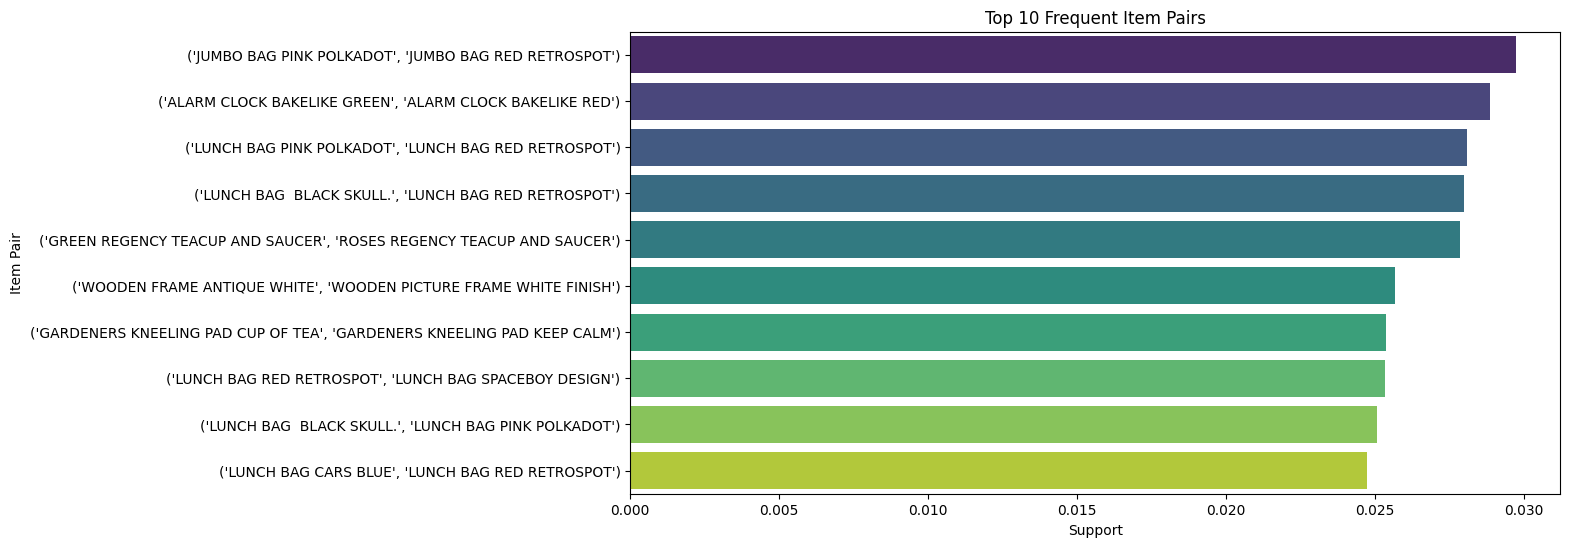

In [ ]:
# Visualization 1: Bar Chart of Top 10 Frequent Item Pairs
plt.figure(figsize=(12, 6))
sns.barplot(x=pairs_df["Support"], y=pairs_df["Item Pair"].astype(str), palette="viridis")
plt.xlabel("Support")
plt.ylabel("Item Pair")
plt.title("Top 10 Frequent Item Pairs")
plt.show()

<ipython-input-25-36d57801c80e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=items_df["Support"], y=items_df["Item"], palette="coolwarm")


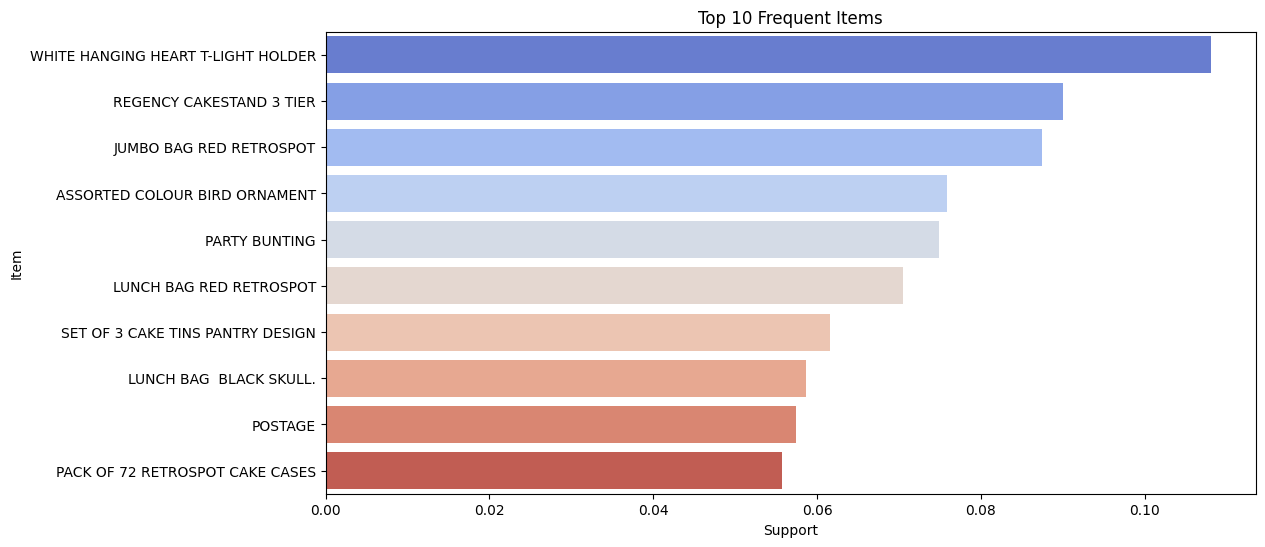

In [ ]:
# Visualization 2: Frequent Items Distribution
items_df = pd.DataFrame(list(frequent_items.items()), columns=["Item", "Support"])
items_df = items_df.sort_values(by="Support", ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=items_df["Support"], y=items_df["Item"], palette="coolwarm")
plt.xlabel("Support")
plt.ylabel("Item")
plt.title("Top 10 Frequent Items")
plt.show()

<ipython-input-26-97f7c076f47c>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.010463131229693265' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pair_matrix.at[item1, item2] = support
<ipython-input-26-97f7c076f47c>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.010463131229693265' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pair_matrix.at[item2, item1] = support
<ipython-input-26-97f7c076f47c>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.01343686326339556' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pair_matrix.at[item1, item2] = support
<ipython-input-26-97f7c076f47c>:6: FutureWarning: Setting a

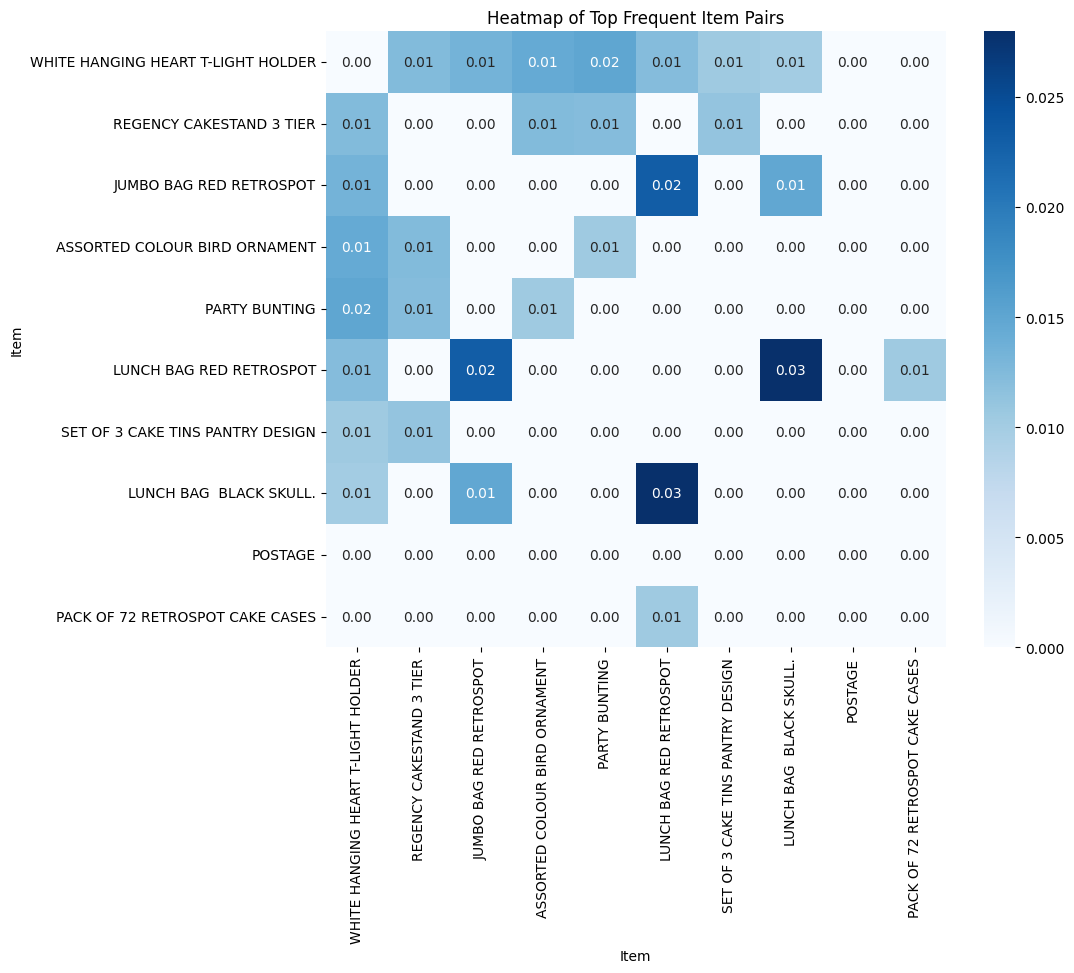

In [ ]:
# Visualization 3: Heatmap of Frequent Item Pairs
pair_matrix = pd.DataFrame(0, index=items_df["Item"], columns=items_df["Item"])
for (item1, item2), support in frequent_pairs.items():
    if item1 in pair_matrix.index and item2 in pair_matrix.columns:
        pair_matrix.at[item1, item2] = support
        pair_matrix.at[item2, item1] = support

plt.figure(figsize=(10, 8))
sns.heatmap(pair_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Heatmap of Top Frequent Item Pairs")
plt.show()